In [1]:
from __future__ import annotations
import xarray as xr
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import logging
import numpy as np
import pandas as pd
import xarray as xr
import pv_functions
import os
import glob
import os
import re
import cftime

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable albedo as the horizontal dimensions for the regridding.
  warnings.warn(


In [2]:
# Define the directory and file paths
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/CanESM5/"
field = "specific generation"

In [3]:
import xarray as xr

path_BOC = f"{diri}/historical/"
files_BOC = [f"{path_BOC}aggregated_solar_power_{year}.nc" for year in range(1980, 2015)]

# Open each file and assign a time coordinate as the year
datasets_BOC = []
for year, file in zip(range(1980, 2015), files_BOC):
    ds_BOC = xr.open_dataset(file, engine="netcdf4")
    ds_BOC = ds_BOC.expand_dims(time=[year])  # Add a time dimension with the year as an integer
    datasets_BOC.append(ds_BOC)

# Combine all datasets along the time dimension
combined_ds_BOC = xr.concat(datasets_BOC, dim="time")

# Calculate the mean across all years
mean_power_BOC = combined_ds_BOC[field].mean(dim="time")

# Save the result to a new NetCDF file (optional)
mean_power_BOC.to_netcdf(f"{path_BOC}mean_solar_power_BOC.nc")

# Print the result
print(mean_power_BOC)

<xarray.DataArray 'specific generation' (lat: 11, lon: 17)> Size: 1kB
array([[1615.95483507, 1622.42867555, 1623.95263088, 1697.33995505,
        1710.35501959, 1650.47072289, 1634.9236749 , 1685.10516475,
        1652.43185298, 1616.60802282, 1556.04280805, 1524.20502218,
        1546.86639702, 1576.81430976, 1615.86027671, 1623.2585197 ,
        1573.00122813],
       [1546.85098545, 1580.38857653, 1603.98212149, 1643.3890003 ,
        1631.72491328, 1540.82243329, 1504.72737952, 1514.003917  ,
        1543.7482034 , 1538.0923448 , 1514.8169281 , 1523.87442895,
        1479.96275542, 1504.94712674, 1520.10251083, 1484.85365184,
        1471.84819899],
       [1469.49791754, 1433.73010103, 1443.18030172, 1492.96641673,
        1528.18592707, 1482.06954141, 1463.52578696, 1448.06983382,
        1493.36593771, 1422.69624184, 1406.29710084, 1375.65351393,
        1367.19685262, 1395.05094962, 1295.98640703, 1279.49113999,
        1262.47640589],
       [1261.06073761, 1220.63998562, 1257

In [4]:
path_EOC = f"{diri}/ssp585/"
files_EOC = [f"{path_EOC}aggregated_solar_power_{year}.nc" for year in range(2065, 2100)]

# Open each file and assign a time coordinate as the year
datasets_EOC = []
for year, file in zip(range(2065, 2100), files_EOC):
    ds_EOC = xr.open_dataset(file)
    ds_EOC = ds_EOC.expand_dims(time=[year])  # Add a time dimension with the year as an integer
    datasets_EOC.append(ds_EOC)

# Combine all datasets along the time dimension
combined_ds_EOC = xr.concat(datasets_EOC, dim="time")

# Calculate the mean across all years
mean_power_EOC = combined_ds_EOC[field].mean(dim="time")

# Save the result to a new NetCDF file (optional)
mean_power_EOC.to_netcdf(f"{path_EOC}mean_solar_power_EOC.nc")

# Print the result
print(mean_power_EOC)

<xarray.DataArray 'specific generation' (lat: 11, lon: 17)> Size: 1kB
array([[1524.56109335, 1628.03853204, 1650.25968903, 1749.73796029,
        1738.35887942, 1708.91829713, 1683.73783072, 1697.33323197,
        1678.32047169, 1662.94427789, 1630.02673435, 1597.90530675,
        1618.44995904, 1648.34263328, 1668.27341048, 1690.92315762,
        1595.43968058],
       [1610.35100761, 1604.3144391 , 1614.24319053, 1651.38233346,
        1651.6560618 , 1575.51733735, 1565.63082344, 1569.84975045,
        1592.23869511, 1585.34579342, 1569.05886885, 1556.12145957,
        1522.9207216 , 1563.8905634 , 1555.6049764 , 1557.70548801,
        1546.31982784],
       [1541.25427301, 1485.18773816, 1507.81409035, 1551.2971527 ,
        1559.65799106, 1485.56098805, 1458.29112   , 1450.59052784,
        1503.48706086, 1438.40218052, 1442.81874232, 1414.55863884,
        1407.53547843, 1440.33709918, 1325.73500604, 1327.38310179,
        1312.81414775],
       [1313.94504393, 1264.74467222, 1303

In [5]:
# Assuming mean_power_EOC and mean_power_BOC are xarray.DataArray objects
relative_difference = (mean_power_EOC - mean_power_BOC) / mean_power_BOC * 100

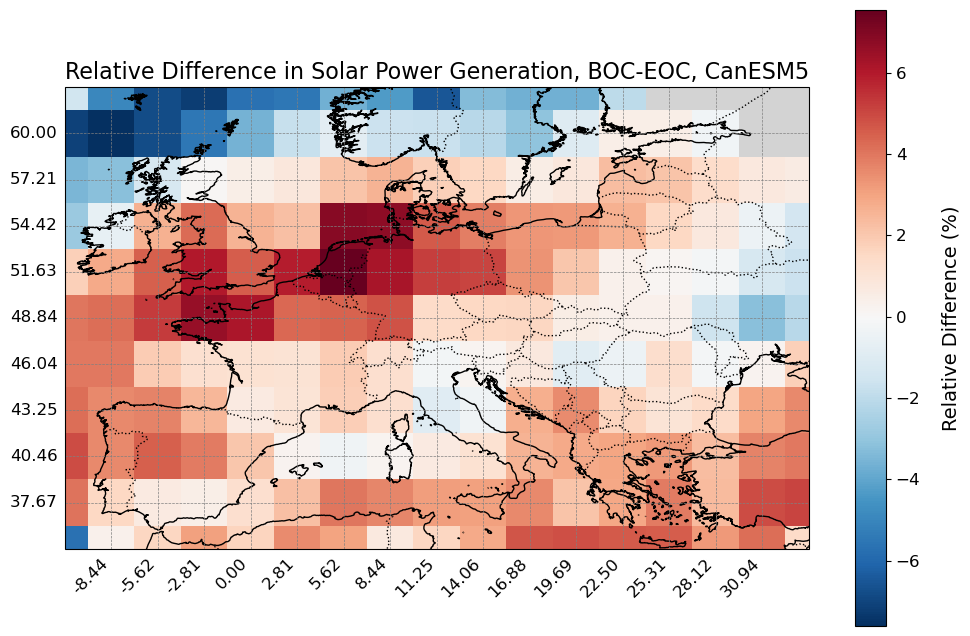

In [6]:
from plots import map_plots
map_plots(relative_difference, title="Relative Difference in Solar Power Generation, BOC-EOC, CanESM5", cmap="RdBu_r", label="Relative Difference (%)")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the directory and models
models = ["ACCESS-CM2", "CanESM5", "CMCC-CM2-SR5", "CMCC-ESM2","HadGEM3-GC31-LL", "HadGEM3-GC31-MM", "MRI-ESM2-0"]  # Replace with actual model names
diri = "/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/"

# Initialize vmin and vmax
vmin = float("inf")
vmax = float("-inf")

# Dictionary to store relative differences for each model
relative_differences = {}

# Loop through each model
for model in models:
    # Define paths for BOC and EOC
    path_BOC = f"{diri}/{model}/historical/"
    path_EOC = f"{diri}/{model}/ssp585/"
    
    # Load BOC files
    files_BOC = [f"{path_BOC}aggregated_solar_power_{year}.nc" for year in range(1980, 2015)]
    datasets_BOC = []
    for year, file in zip(range(1980, 2015), files_BOC):
        ds_BOC = xr.open_dataset(file, engine="netcdf4")
        ds_BOC = ds_BOC.expand_dims(time=[year])
        datasets_BOC.append(ds_BOC)
    combined_ds_BOC = xr.concat(datasets_BOC, dim="time")
    mean_power_BOC = combined_ds_BOC["specific generation"].mean(dim="time")
    
    # Load EOC files
    files_EOC = [f"{path_EOC}aggregated_solar_power_{year}.nc" for year in range(2065, 2100)]
    datasets_EOC = []
    for year, file in zip(range(2065, 2100), files_EOC):
        ds_EOC = xr.open_dataset(file)
        ds_EOC = ds_EOC.expand_dims(time=[year])
        datasets_EOC.append(ds_EOC)
    combined_ds_EOC = xr.concat(datasets_EOC, dim="time")
    mean_power_EOC = combined_ds_EOC["specific generation"].mean(dim="time")
    
    # Calculate relative difference
    relative_difference = (mean_power_EOC - mean_power_BOC) / mean_power_BOC * 100
    relative_differences[model] = relative_difference
    
    # Update vmin and vmax
    vmin = min(vmin, relative_difference.min().values)
    vmax = max(vmax, relative_difference.max().values)

# Plot relative differences for each model
for model, relative_difference in relative_differences.items():
    lon = relative_difference.lon
    lat = relative_difference.lat

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

    # Plot the relative difference
    c = ax.pcolormesh(
        lon, lat, relative_difference,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        shading='auto',
        vmin=vmin,  # Use global vmin
        vmax=vmax,  # Use global vmax
    )

    # Add map features
    ax.coastlines(resolution='10m', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.set_title(f"Relative difference between BOC and EOC, {model} (%)")

    # Add gridlines
    gridlines = ax.gridlines(
        draw_labels=True,
        linewidth=0.5,
        color='gray',
        linestyle='--',
        x_inline=False,
        y_inline=False
    )
    gridlines.top_labels = False
    gridlines.right_labels = False

    # Add colorbar
    cbar = fig.colorbar(c, ax=ax, orientation='vertical')
    cbar.set_label('Relative difference (%)', rotation=90, labelpad=15)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/power/ACCESS-CM2/historical/solar_power_1980.nc_aggregated'